In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the training and the test set
train_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s4e2/train.csv")
test_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s4e2/test.csv")

#previewing first 5 rows
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
#previewing statistical values of the data
train_df.describe(include='all')

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


The training set contains both categorical and numerical features. 
Categorical ones: Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
Numerical ones: Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE

Within these two groups we have:
- binary features: Gender, family_history_with_overweight, SMOKE, FAVC, SCC
- continuous features: Age, Height, Weight, CH2O
- ordinal features: FAF, TUE, CALC, CAEC

Description of the acronym features:
- FAVC = Frequent consumption of high caloric food
- FCVC = Frequency of consumption of vegetables
- NCP = Number of main meals
- CAEC = Consumption of food between meals
- CH2O = Consumption of water daily
- SCC = Calories consumption monitoring
- FAF = Physical activity frequency
- TUE = Time using technology devices
- CALC = Consumption of alcohol
- MTRANS = Transportation used

Our target is the multiclass features NObeyesdad, which can take one of 7 values. Bearing this in mind, we will have to use the models that are suitable for multiclass classification.

Binary features needs to be one-hot-encoded in the preprocessing pipeline and ordinal categorical features can be turned into numbers.

It seems that there are some outliers in our data, especially in Age, but the training set is relatively small, so for now no exclusions from the set are planned. In general, Age and Weight have a quite high variance, but it seems that they can play a significant role in the categorization, because as per the medical findings they can correlate with obesity.

The target values are based on the score that is similar to the BMI calculation. However, the set was checked in this aspect and it turned out that the values of the target are not assigned basing on the result of the BMI calculation.


In [3]:
#checking if there are any null values
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
test_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [5]:
#checking the types of data
train_df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
#dividing the features into numerical and categorical ones to plot them against the target
categorical_features=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]
numerical_features=["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]

C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_II", f], kde=True, color='green', label='Overweight_Level_II')
C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

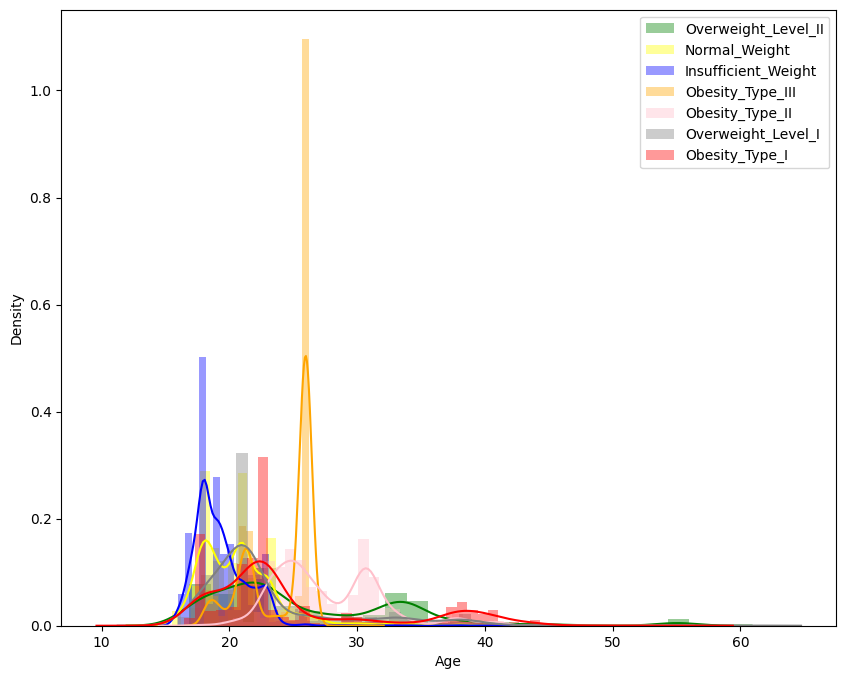

C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_II", f], kde=True, color='green', label='Overweight_Level_II')
C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

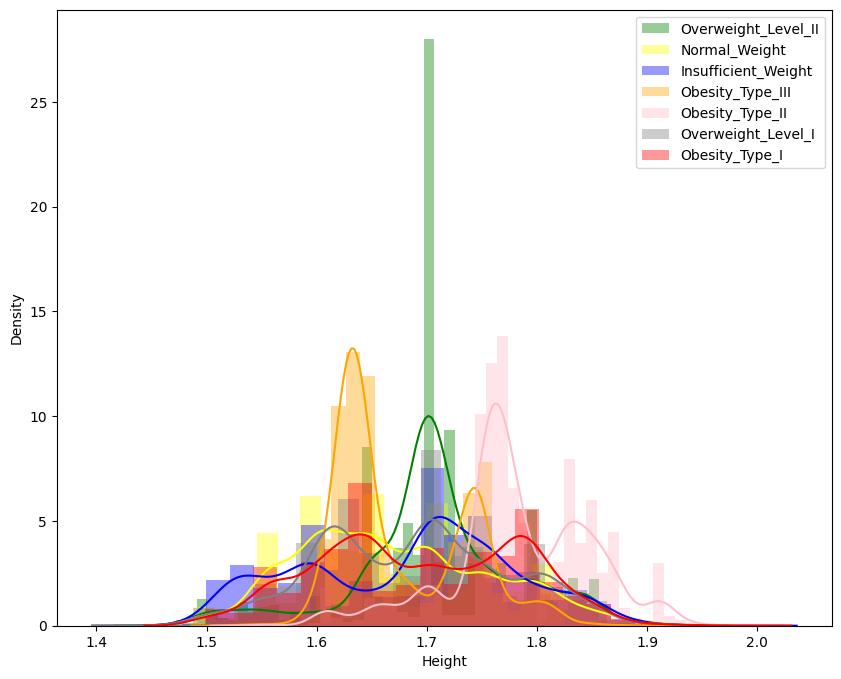

C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_II", f], kde=True, color='green', label='Overweight_Level_II')
C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

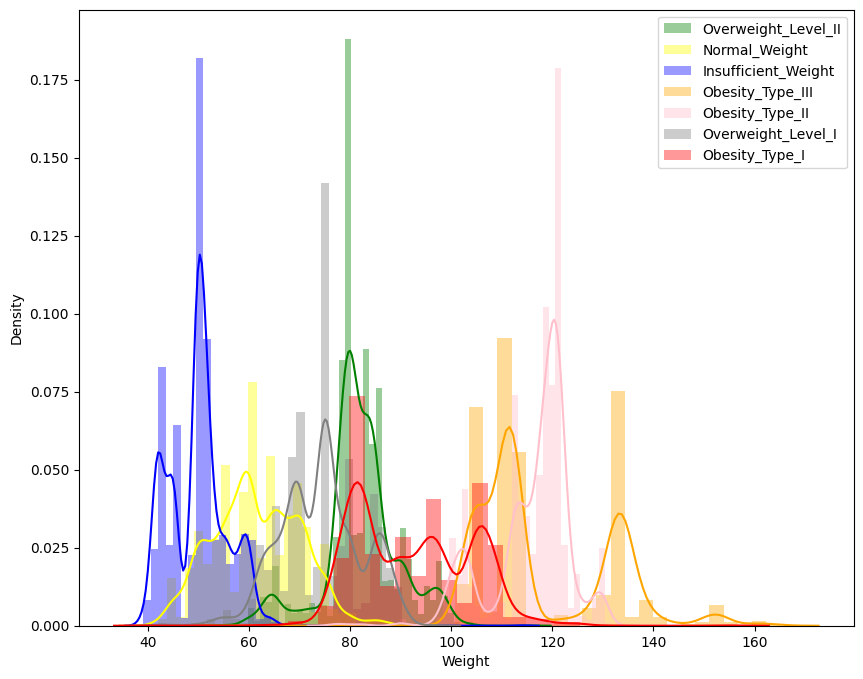

C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_II", f], kde=True, color='green', label='Overweight_Level_II')
C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

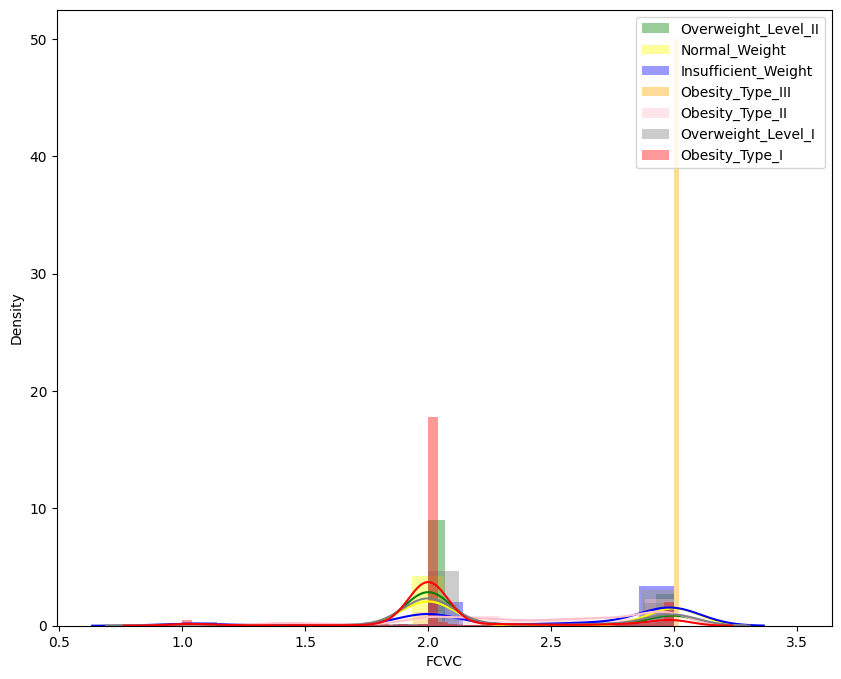

C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_II", f], kde=True, color='green', label='Overweight_Level_II')
C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

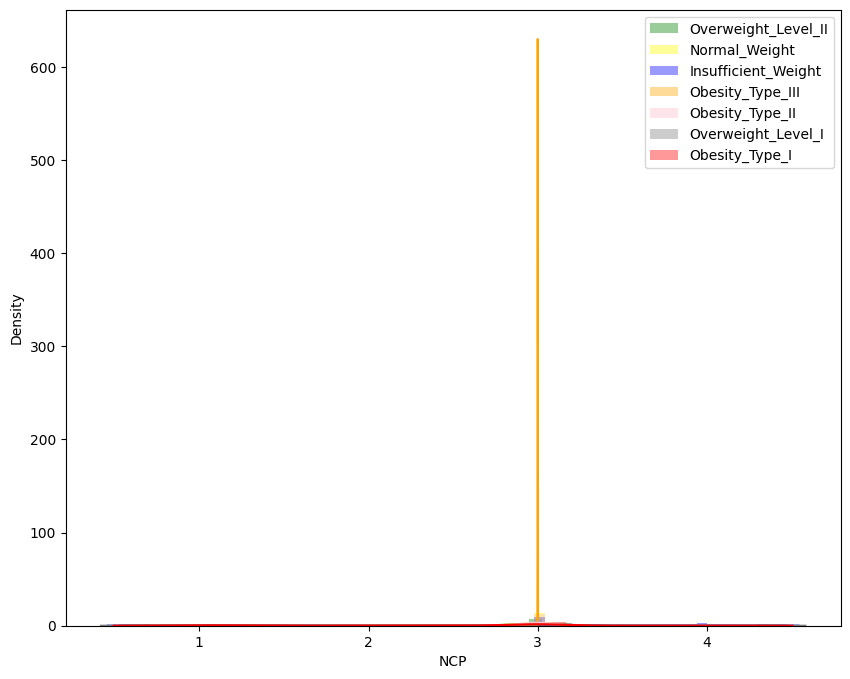

C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_II", f], kde=True, color='green', label='Overweight_Level_II')
C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

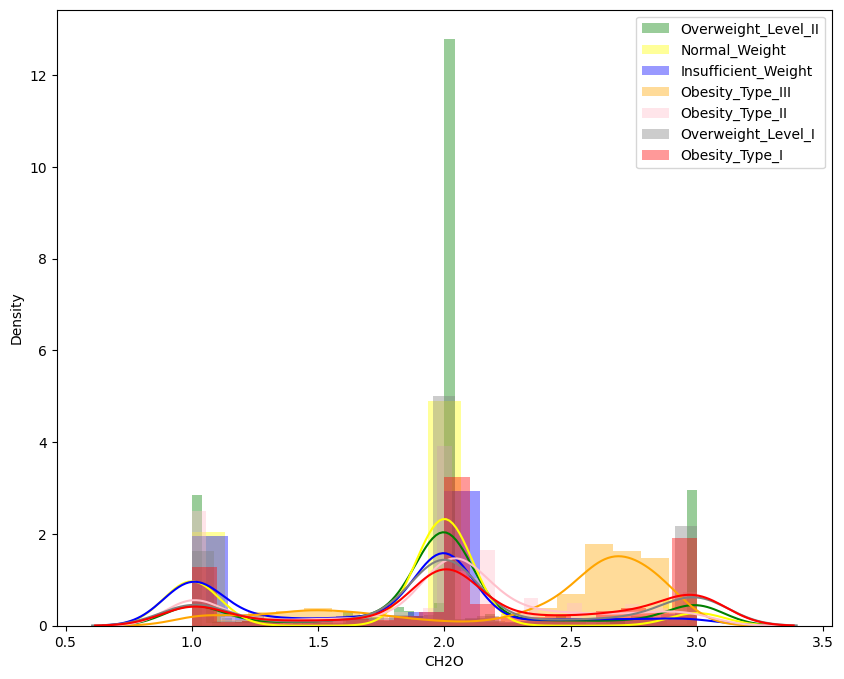

C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_II", f], kde=True, color='green', label='Overweight_Level_II')
C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

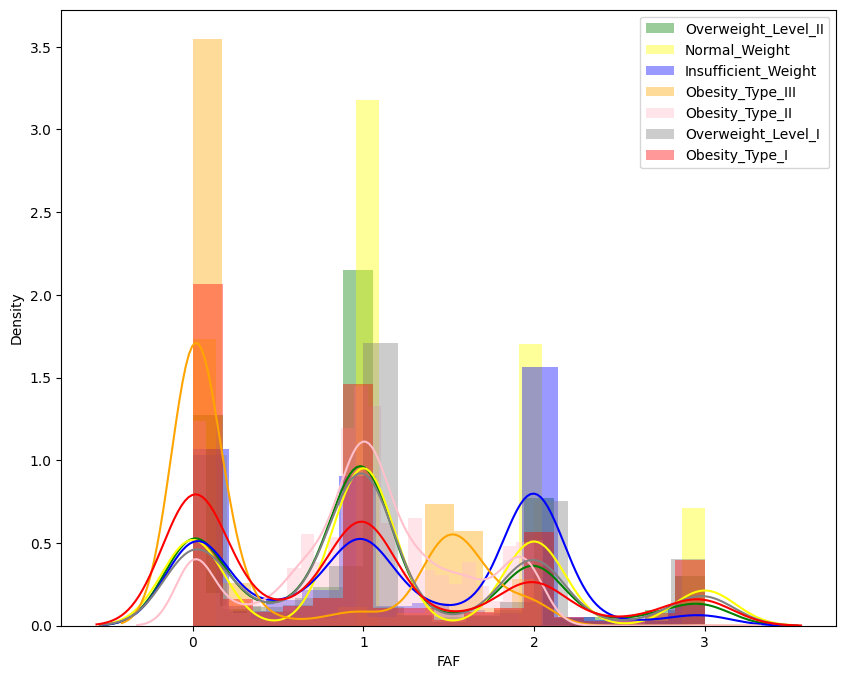

C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_II", f], kde=True, color='green', label='Overweight_Level_II')
C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\1775175775.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

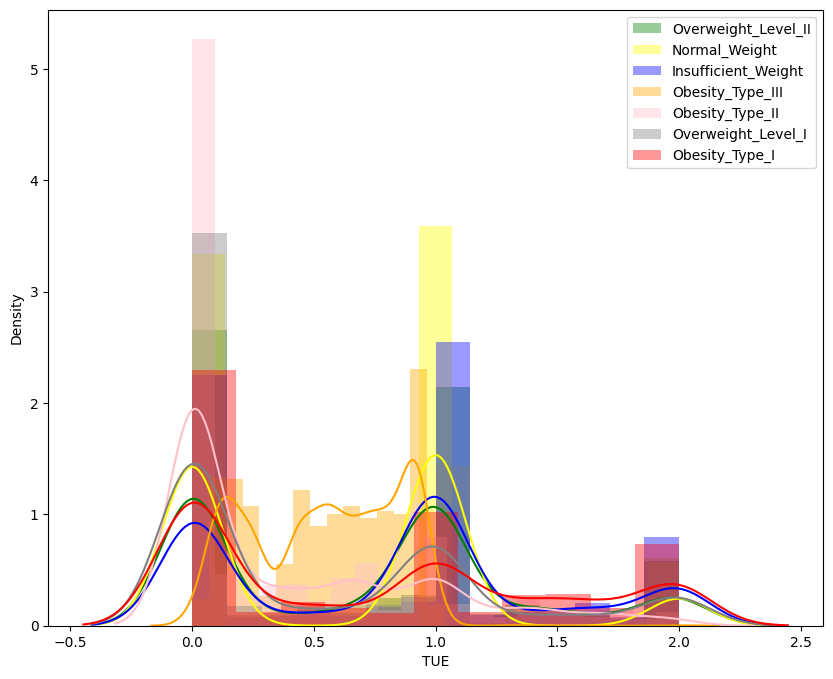

In [7]:
for f in numerical_features:
    plt.figure(figsize=(10,8))
    sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_II", f], kde=True, color='green', label='Overweight_Level_II')
    sns.distplot(train_df.loc[train_df['NObeyesdad']=="Normal_Weight", f], kde=True, color='yellow', label='Normal_Weight')
    sns.distplot(train_df.loc[train_df['NObeyesdad']=="Insufficient_Weight", f], kde=True, color='blue', label='Insufficient_Weight')
    sns.distplot(train_df.loc[train_df['NObeyesdad']=="Obesity_Type_III", f], kde=True, color='orange', label='Obesity_Type_III')
    sns.distplot(train_df.loc[train_df['NObeyesdad']=="Obesity_Type_II", f], kde=True, color='pink', label='Obesity_Type_II')
    sns.distplot(train_df.loc[train_df['NObeyesdad']=="Overweight_Level_I", f], kde=True, color='grey', label='Overweight_Level_I')
    sns.distplot(train_df.loc[train_df['NObeyesdad']=="Obesity_Type_I", f], kde=True, color='red', label='Obesity_Type_I')
    plt.legend(loc='upper right')
    plt.show()

The plots show what numerical features correlate with the target the most and will help the model distinguish between the classes. Age, Height, Weight and FAF seem the most informative, but the correlation is not linear. 
It can be observed that Insufficient Weight occurs mostly under age of 20, while Obesity Type III around age of 25-28 Obesity Type II is more frequent between age of 22 and 33. The correlation between other classes and Age is not that prominent and the classes overlap themselves, but not in every detail.
Regarding Height, we can see that Overweight Level II, Obesity Type II and Obesity Type III occur more often with certain height ranges. The other target values overlap themselves to some extent. 
Weight seem the most promising in target classes distinguishing and here the correlation is the most vivid and almost linear. Generally, the higher the weight, the more obese the subject is qualified as. 
FCVC, NCP, CH2O are not helpful in distinguishing between the target classes.
FAF, TUE seems better in this aspect, but still the classes are overlapping themselves. They will be excluded from the training set. 


In [8]:
X_numerical=train_df[numerical_features]

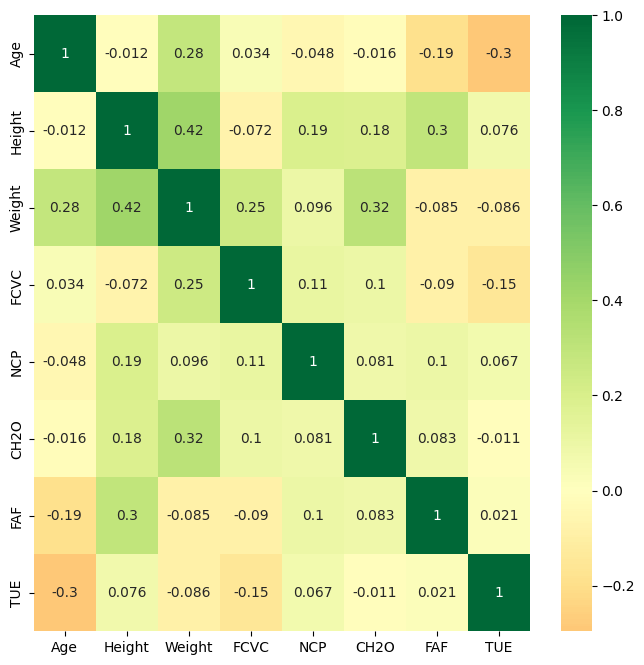

In [9]:
#checking in the heatmap if the numerical feature carry the same information or not
plt.figure(figsize=(8,8))
ax=sns.heatmap(X_numerical.corr(),
    xticklabels=X_numerical.corr().columns,
    yticklabels=X_numerical.corr().columns,
    cmap='RdYlGn',
    center=0,
    annot=True)
plt.show()

The numerical features don't carry the same information and are not correlated with each other.

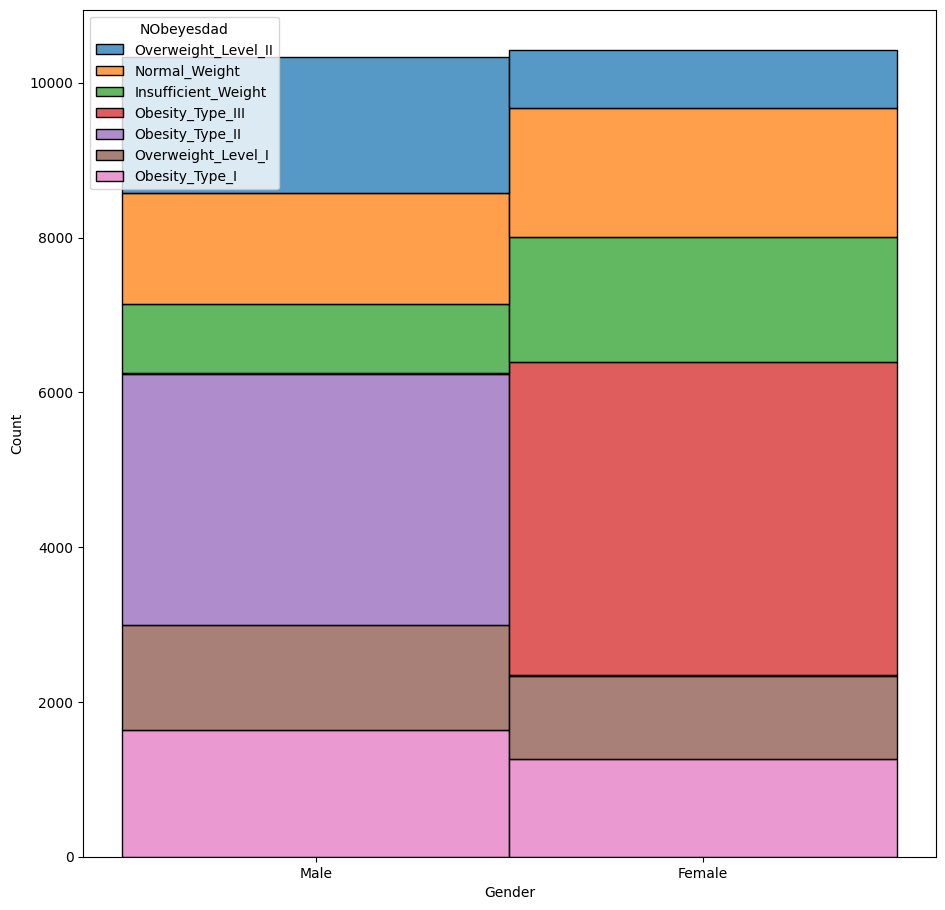

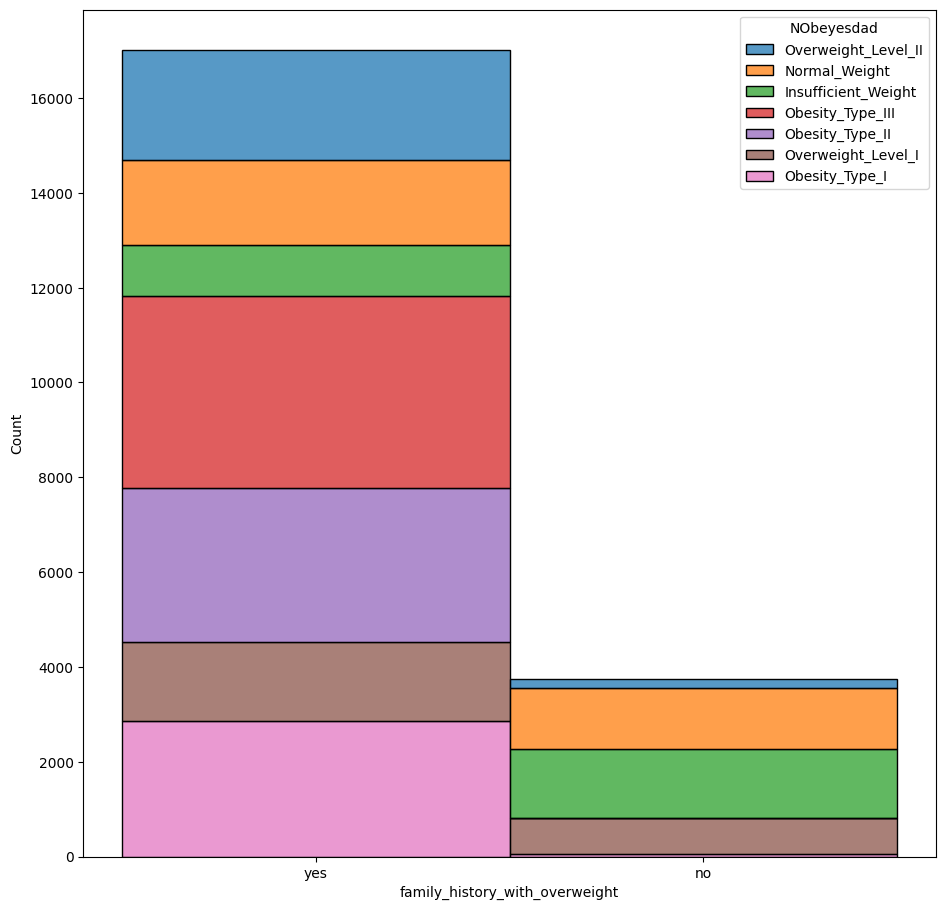

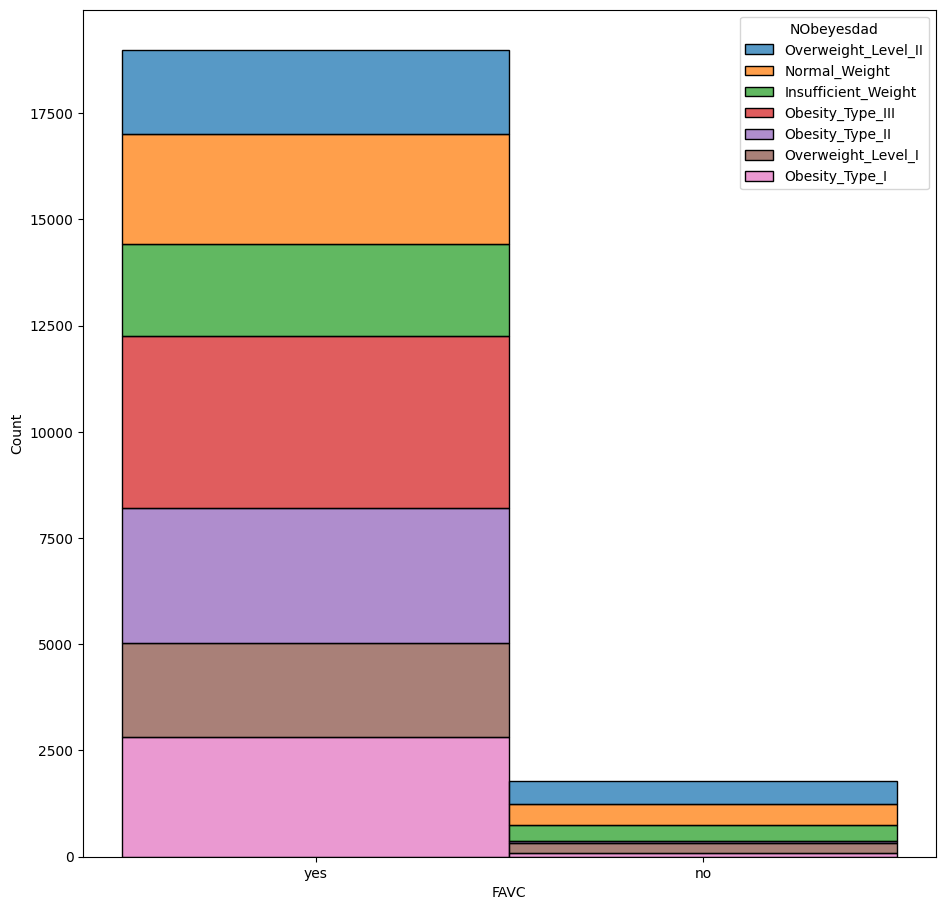

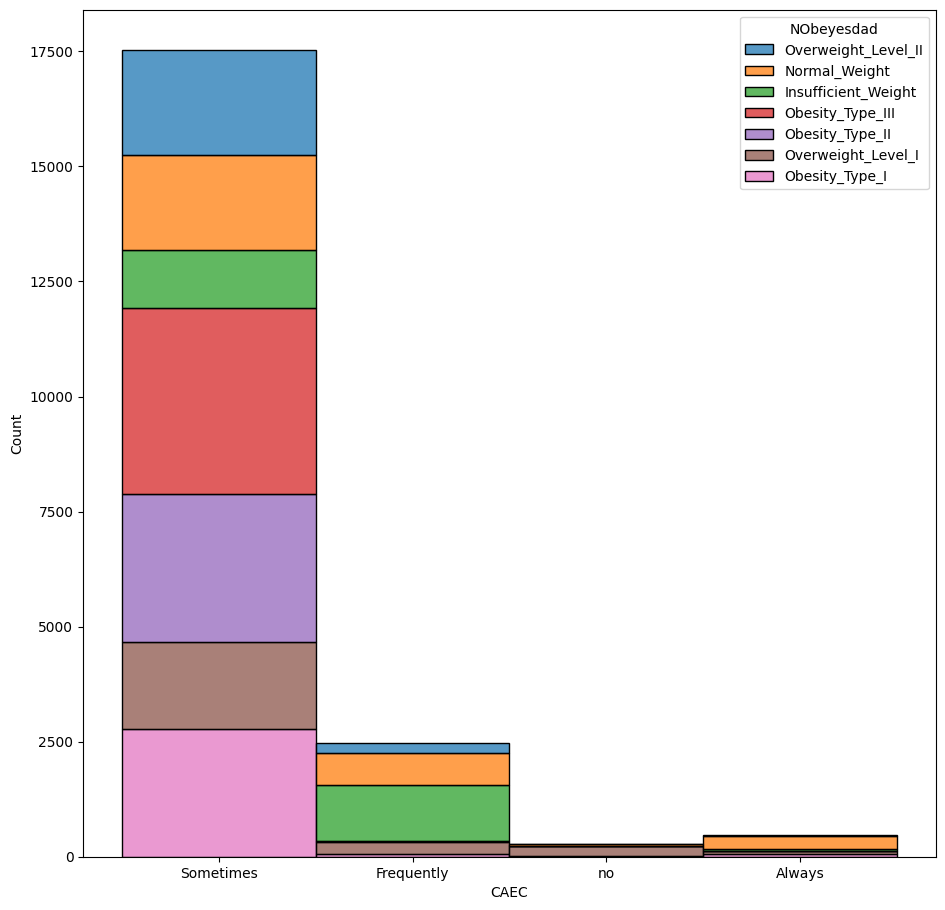

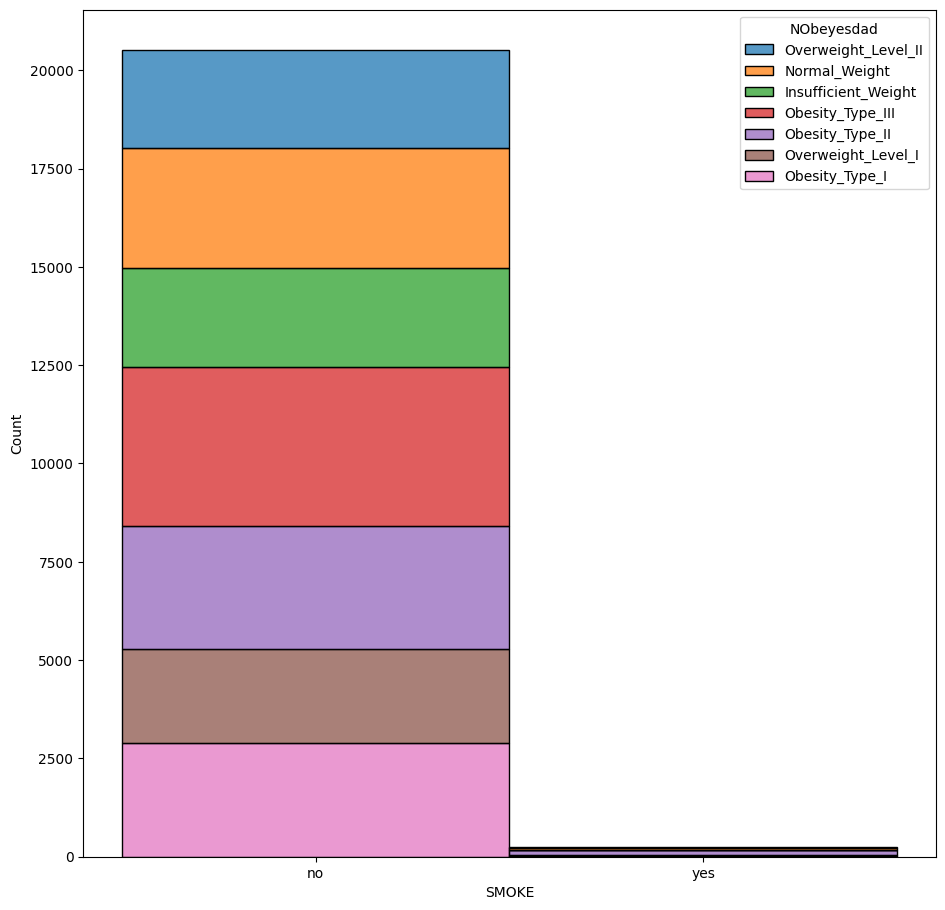

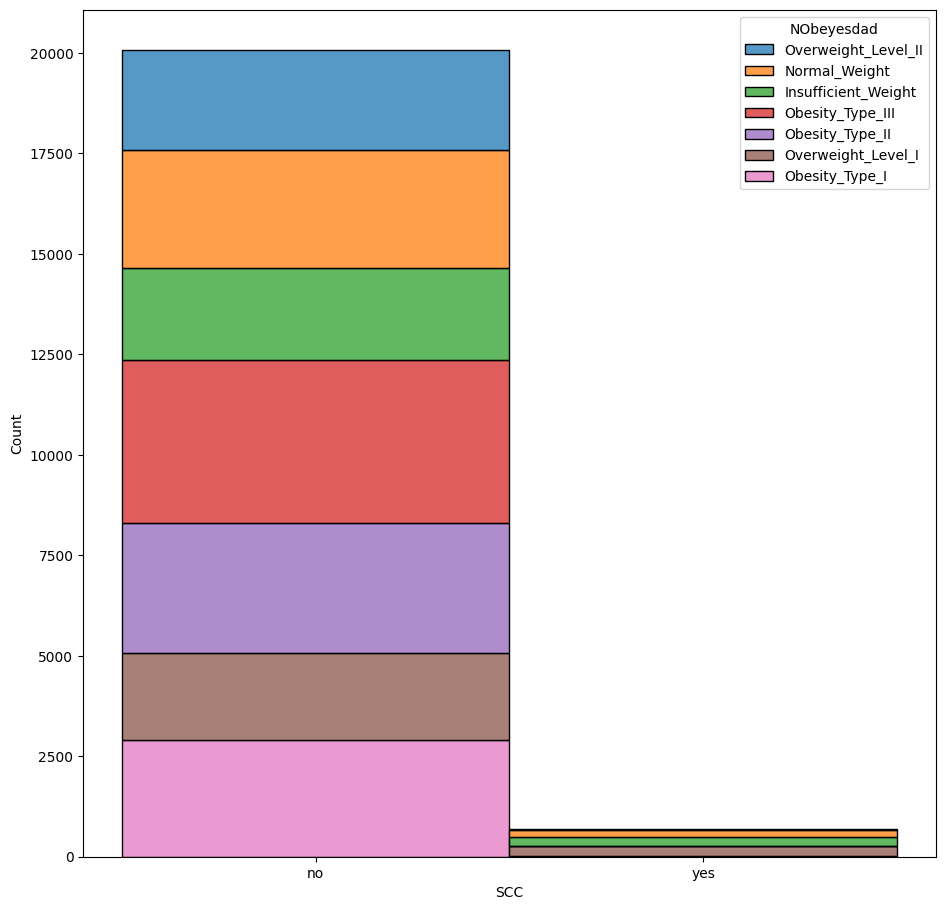

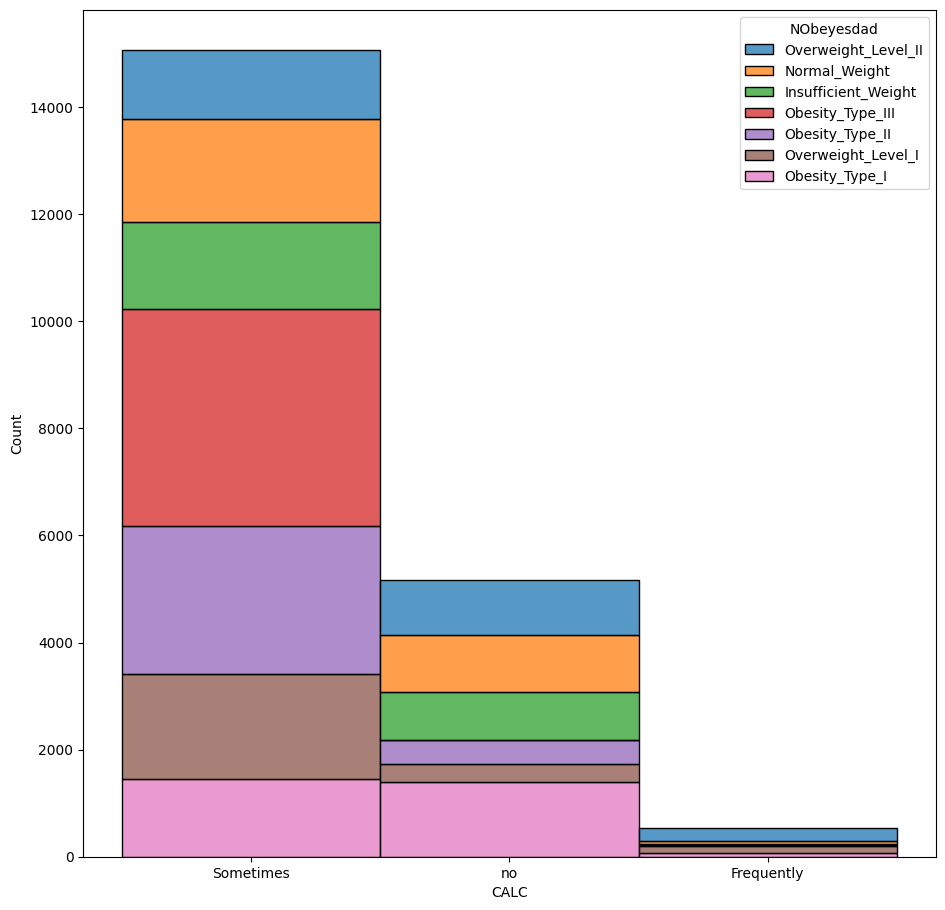

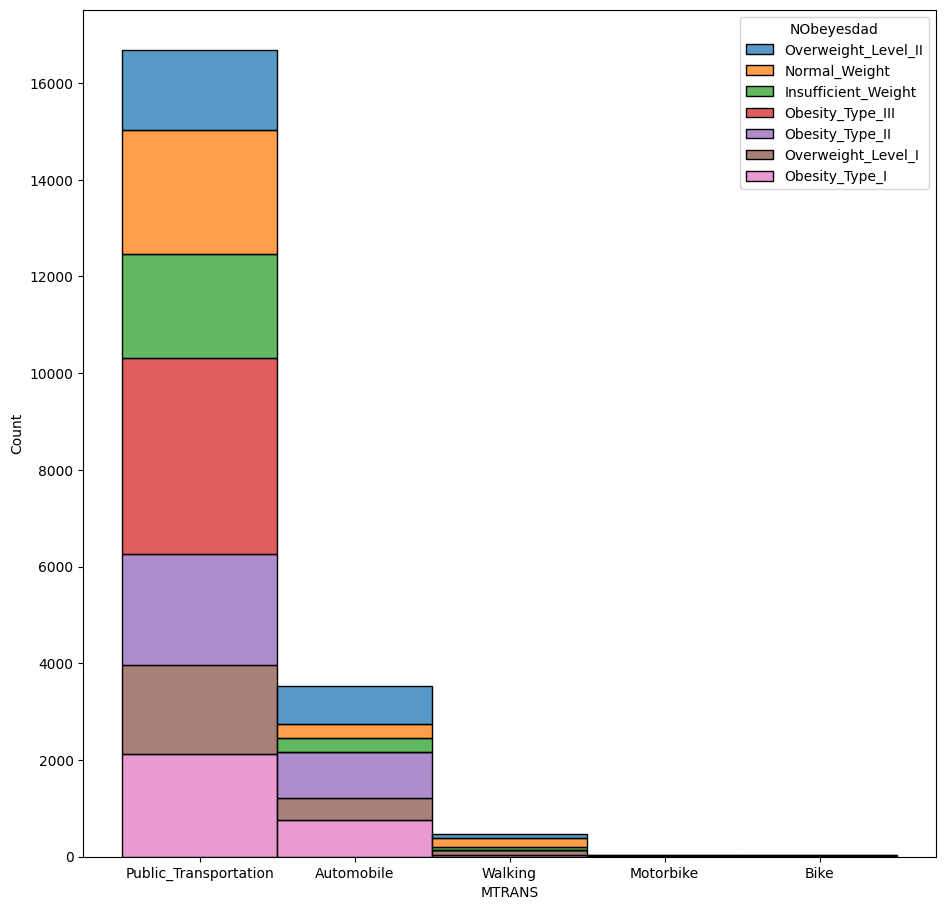

In [10]:
for f in categorical_features:
    plt.figure(figsize=(11,11))
    sns.histplot(data=train_df,x=f,hue="NObeyesdad", stat="count",multiple="stack")
    plt.show()

The plots above display categorical features vs the target. For Gender, it can be observed that Obesity Type III occurs only in women, while Obesity Type II only in men. Other target values are typical for both genders, but some values are more common for each gender (Insufficient Weight for women, Overweight Level II and Obesity Type I for men). 
Family History With Overweight – here some target values appear only for the yes-value of this feature (Obesity Type III, Obesity Type II, Obesity Type I) and prevalent for some others (Overweight Level II). Almost identical relationship is visible for FAVC, thus, these two features will be helpful in distinguishing most of the target values.
The CAEC value of ‘Sometimes’ goes together with Obesity Type I, Obesity Type II, Obesity Type III, Overweight Level II. These classes are almost exclusive for this value. Insufficient Weight is more frequent for the value of ‘Frequently’, while Normal Weight for the value of ‘Always’.
Smoke feature is very disproportional, as there are much more instances with no-value than the yes-value. Moreover, the no-value instances go together with every value of the target, so this feature will be excluded from the training set. Similarly, SCC doesn’t seem very prominent in distinguishing between the target values, but no-values of this feature go inclusively with Overweight Level II, Obesity Type III, Obesity Type II, so this feature will be left in the training set.
Obesity Type II, Obesity Type III, Overweight Level I are more common for instances with the value ‘Sometimes’ for CALC. Insufficient Weight, Obesity Type I and Overweight Level II appear frequently, when a person doesn’t consume alcohol. Frequent consumption of alcohol indicates only certain values of the target, so all in all, this feature seems helpful for our model.
MTRANS – Obesity Type III seems to appear only for instances with the value of ‘Public_Transportation’. Insufficient Weight and Normal Weight are also more common for this value. Yet, Obesity Type I and Overweight Level II appear more often when a person chooses automobile as a form of transportation. Bike and motorbike are values that are very rare.


In [11]:
#replacing categorical values as stated above
train_df['CAEC'].replace(["no","Sometimes","Always","Frequently"],[0,1,3,2],inplace=True)
train_df['CALC'].replace(["no","Sometimes","Frequently"],[0,1,2],inplace=True)

C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\511350645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['CAEC'].replace(["no","Sometimes","Always","Frequently"],[0,1,3,2],inplace=True)
C:\Users\pfali\AppData\Local\Temp\ipykernel_48256\511350645.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [12]:
#deleting the features as stated above
train_df.drop(columns=['SMOKE','FCVC','NCP','CH2O','FAF','TUE'],inplace=True)
test_df.drop(columns=['SMOKE','FCVC','NCP','CH2O','FAF','TUE'],inplace=True)

In [18]:
categorical=["Gender","family_history_with_overweight","FAVC","CAEC","SCC","CALC","MTRANS"]

In [22]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X=train_df.drop(['NObeyesdad'],axis=1)
y=train_df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
categorical_transformer=Pipeline(steps=[("encoder",OneHotEncoder(handle_unknown='ignore'))])
transformer=ColumnTransformer(transformers=[('categorical',categorical_transformer, categorical)])
final_pipeline=Pipeline(steps=[('transformer',transformer),('model',GradientBoostingClassifier())])
params={'model__n_estimators':[100,200,300,400,500,1000],'model__learning_rate':[1.0,0.1,0.5]}
gsearch1=GridSearchCV(final_pipeline,param_grid=params,scoring='f1_macro')
gsearch1.fit(X_train, y_train)
print("The best parameters are:", gsearch1.best_params_)
model=gsearch1.best_estimator_
print(model.score(X_train,y_train))

The best parameters are: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
0.5938747419132828


The results of the model are not good and the estimator is underfitting a lot. In further steps, we will review the features and decide what to change to gain better metrics.